In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Hypothesis Testing

In Data8.2x, you have been using simulation to conduct hypothesis testing. Now that we have completed Data8.2x, this is a good time to take a step back and reflect on hypothesis testing. 

Every hypothesis test has roughly the same structure. The following 4 steps provide a rough outline:

1) State the null and alternate hypotheses. Generally, the alternate hypothesis is what you are trying to show. Essentially, if you want to show a result, we assume the opposite is true and try to prove ourselves wrong. 

2) Determine/calculate a test statistic. See your book for a formal definition, but generally, the test statistic is any quantity that helps us evaluate our sample with respect to our null hypothesis. 

3) Determine distribution of test statistic and compute a $p$-value. If you have taken inferential statistics before, you likely computed a $z$ or $t$ statistic and used a calculator or table to compute a $p$-value. This is based on asymptotic theory of sample means/proportions. This is not the approach taken in Data8.2x. With better computing power, we can use simulation to obtain an empirical distribution of our test statistic under the null hypothesis. 

4) Conclude. For low $p$-value (generally below 0.05), we reject the null hypothesis. For high $p$-value, we fail to reject. Low $p$-value implies that our sample would be very unusual if the null hypothesis were actually true. Therefore, that is evidence that the null hypothesis is wrong. 

### Example

Let's work through an example. Suppose that in the upcoming election, Referendum A is up for approval in Colorado. You suspect that in El Paso County, more than half of eligible voters support the referendum. You collect a random sample of 200 eligible voters in El Paso County and 115 of them express support. Is there evidence to conclude that supports your suspicion? 

#### Step 1: Hypothesis

State the null and alternative hypotheses.

$H_0$ : Half of eligible voters support the referendum.

$H_i$ : More than half of eligible voters support the referendum.

#### Step 2: Test Statistic

Select a test statistic and compute that test statistic for the sample.

The test statistic is 115-100 = 15.

#### Step 3: $p$-value

3a) If $H_0$ were true, what should the value of $\hat{p}$ be close to? In other words, if in fact, half of eligible voters support the referendum, what value should your test statistic take? 

The p-value should be close to zero if half of eligible voters support the referendum.

3b) In words (and in the context of this problem), describe what the $p$-value is. 

There would be no different between the observed results and the null hypothesis. We would expect to see 100 voters supporting the referendum and the difference of 100/200-100/200 = 0.

3c) Find the $p$-value directly and using simulation. Hint: the binomial distribution will be of use here. 

In [18]:
r = stats.binom.rvs(200, .5, size=1000)-100
r[:10]

array([  8, -19,  -6, -13,  -3,   0,  -6,  -8,   9,  10])

In [19]:
pvalue = np.mean(r>=15)
pvalue

0.023

In [21]:
#Checking work
1-stats.binom.cdf(114,200,.5)

0.020018595806698514

#### Step 4: Conclude

What is your conclusion? Be sure to state your conclusion in the context of the problem.

Need to collect more data. Because the p-value is less than .05 we would normally reject that exactly half of the voters supported the referendum.

## Confidence Intervals

Construct and interpret a 95% confidence interval on $p$, the true proportion of eligible El Paso County voters who support the referendum. There are many ways to construct such an interval (bootstrap, the binomial distribution, asymptotically). Select one and implement. 

Also, compare your interval to the results of your hypothesis test. Does your interval contain the value 0.5? Why does that matter? 

The interval does contain the value .5, this is important because it shows that the observed is not far from the null hypothesis.

In [22]:
left_end = percentile(2.5,r)
right_end = percentile(97.5,r)
print("Middle 95% of bootstrap estimates: [{:f}, {:f}]".format(left_end, right_end))

Middle 95% of bootstrap estimates: [-14.000000, 14.000000]


#### Bootstrap Method

In [23]:
sample=np.repeat([0,1],[85,115])

In [24]:
bootstrap=[]
for _ in np.arange(10000):
    bootstrap = np.append(bootstrap, sum(np.random.choice(sample,size=200))-100)

C:\Users\C20Elizabeth.Frakes\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


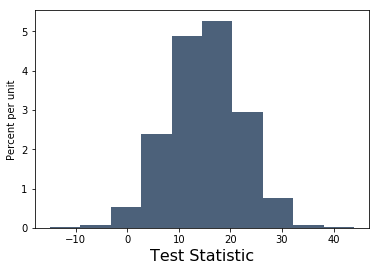

In [25]:
Table().with_column('Test Statistic',bootstrap).hist()

In [26]:
Table().with_column('Test Statistic',bootstrap).percentile(5)

Test Statistic
4


In [27]:
104/200

0.52

We are 95% confident that the actual proportion of voters in favor is more than 0.52.